<a href="https://colab.research.google.com/github/soham534/Apriori-Algorithm/blob/main/ProjectonMarketBasketAnalysis(AprioriAlgorithm)By_SohamBundela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Installing the apyori to perform the Apriori algo

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

# Importing the dataset

Link: https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

# Data Analysis

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.shape

(38765, 3)

In [ ]:
df.size

116295

In [ ]:
df.ndim

2

In [ ]:
df.isna().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# Q1. Which of the items are the top 10 selling item?
df.itemDescription.value_counts().head(10)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


Text(0.5, 1.0, 'Top 10 selling items')

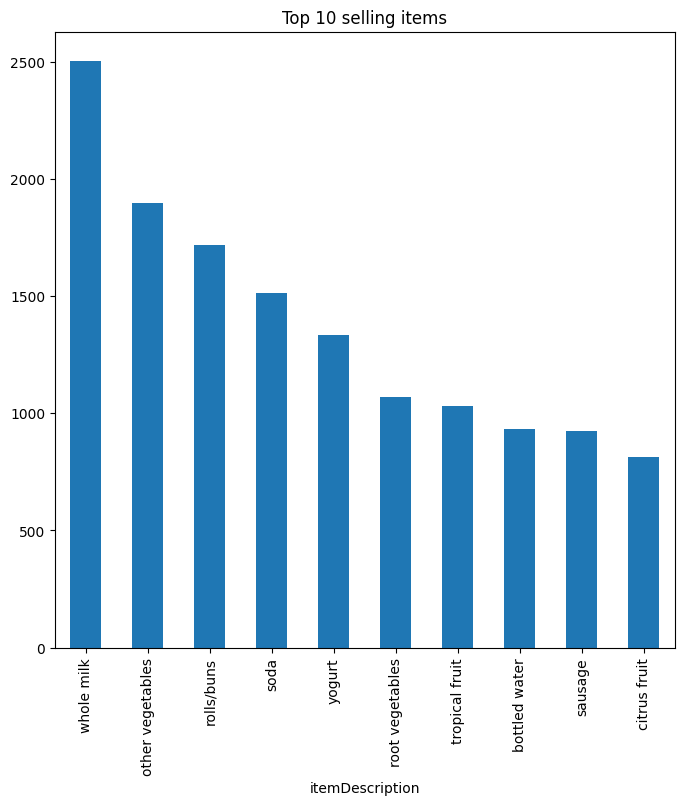

In [ ]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')

In [ ]:
# Q2. Which of the item is the least 10 selling item?
df.itemDescription.value_counts().tail(10).sort_values()

,count
itemDescription,
preservation products,1
kitchen utensil,1
baby cosmetics,3
bags,4
rubbing alcohol,5
toilet cleaner,5
make up remover,5
frozen chicken,5
salad dressing,6


<Axes: xlabel='itemDescription'>

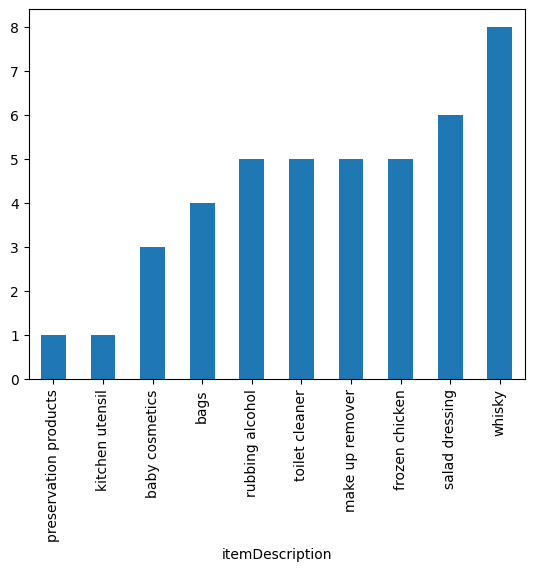

In [ ]:
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# Q3. Top 10 customers
df.Member_number.value_counts().head(10)

,count
Member_number,
3180,36
3737,33
3050,33
2051,33
3915,31
2433,31
2271,31
2625,31
3872,30


<Axes: xlabel='Member_number'>

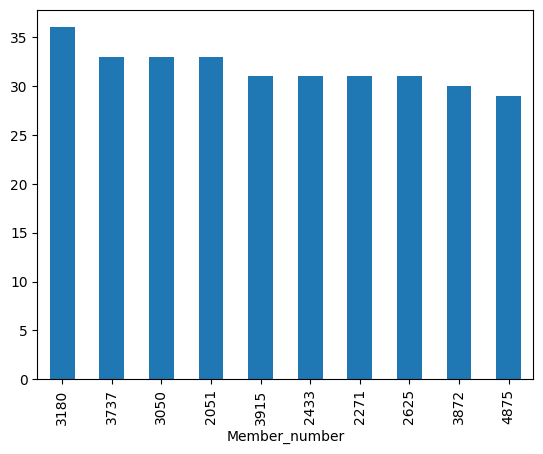

In [ ]:
df.Member_number.value_counts().head(10).plot.bar()

In [ ]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [ ]:
# Q4. In which year, the majority of the transactions has happened?
df.Year.value_counts()

,count
Year,
2015,20488
2014,18277


In [ ]:
df.Month.value_counts()

,count
Month,
8,3498
5,3335
1,3333
6,3316
3,3283
11,3273
7,3268
10,3218
4,3172


In [ ]:
df.Day.value_counts()

,count
Day,
28,1375
21,1354
26,1351
8,1349
13,1341
14,1341
27,1327
4,1308
10,1308


In [ ]:
df[df['Year']==2015]['Month'].value_counts()

,count
Month,
8,1963
1,1829
3,1792
6,1791
11,1777
5,1710
4,1666
10,1663
7,1645


In [ ]:
df[(df['Year'] == 2015) | (df['Month']==8)]['Day'].value_counts()

,count
Day,
28,837
21,799
14,778
5,766
8,765
26,762
27,761
18,756
11,752


# Aprori Implementation

In [ ]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [ ]:
data = df.copy()
data1 = data.copy()

In [ ]:
data = pd.get_dummies(data['itemDescription'],dtype=int)


In [ ]:
data.head(2)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data1.drop(['itemDescription'], axis=1, inplace=True)

In [ ]:
data1 = data1.join(data)

In [ ]:
data1.head()

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
products = df['itemDescription'].unique()

In [ ]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [ ]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [ ]:
data1.groupby(['Member_number', 'Date'])[products[:]].sum()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [ ]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [ ]:
data2 = data2.reset_index()[products]

In [ ]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data2['tropical fruit']

,tropical fruit
0,0
1,0
2,0
3,0
4,0
...,...
14958,1
14959,0
14960,0
14961,0


In [ ]:
def func(data):
  for i in products:
    if data[i] > 0:
      data[i] = i
  return data

In [ ]:
data2 = data2.apply(func,axis=1)

/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canned beer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sausage' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soda' h

In [ ]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
newdata = data2.values

In [ ]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
newdata.ndim

2

In [ ]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [ ]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

# Aproiori Implementation

In [ ]:
association = apriori(newdata,
                      min_support=0.0003,
                      min_confidence=0.01, # Lowered from 0.05
                      min_lift=1.5,       # Lowered from 3
                      max_length=2)

result = list(association)

In [ ]:
result[5]

RelationRecord(items=frozenset({'beef', 'pasta'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'pasta'}), confidence=0.01377952755905512, lift=1.703992321207783), OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'beef'}), confidence=0.05785123966942149, lift=1.7039923212077832)])

In [ ]:
for i in result[5]:
  print(i)

frozenset({'beef', 'pasta'})
0.00046782062420637575
[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'pasta'}), confidence=0.01377952755905512, lift=1.703992321207783), OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'beef'}), confidence=0.05785123966942149, lift=1.7039923212077832)]


In [ ]:
type(result[5])

apyori.RelationRecord

In [ ]:
for i in result[5]:
  print(frozenset )

<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>


In [ ]:
# Itemset: {'soups', 'seasonal products'}
# Association Rule: soups -> seasonal products
# Confidence = 0.10416666666666

In [ ]:
# https://www.programiz.com/python-programming/methods/built-in/frozenset
# https://pypi.org/project/apyori/
# https://github.com/ymoch/apyori

In [ ]:
# Convert the result to a pandas DataFrame for better visualization
def inspect(results):
    items = set()
    for result in results:
        for item in result.items:
            items.add(item)
    items = list(items)
    rows = []
    for result in results:
        support = result.support
        for rule in result.ordered_statistics:
            lhs = ', '.join(list(rule.items_base))
            rhs = ', '.join(list(rule.items_add))
            confidence = rule.confidence
            lift = rule.lift
            rows.append({'Itemset': ', '.join(list(result.items)), 'Support': support, 'Left-hand Side': lhs, 'Right-hand Side': rhs, 'Confidence': confidence, 'Lift': lift})
    df = pd.DataFrame(rows, columns=['Itemset', 'Support', 'Left-hand Side', 'Right-hand Side', 'Confidence', 'Lift'])
    return df

result_df = inspect(result)
display(result_df.head())

,Itemset,Support,Left-hand Side,Right-hand Side,Confidence,Lift
0,"UHT-milk, butter milk",0.000601,UHT-milk,butter milk,0.028125,1.600131
1,"UHT-milk, butter milk",0.000601,butter milk,UHT-milk,0.034221,1.600131
2,"cream cheese , UHT-milk",0.000869,UHT-milk,cream cheese,0.040625,1.717152
3,"cream cheese , UHT-milk",0.000869,cream cheese,UHT-milk,0.036723,1.717152
4,"artif. sweetener, soda",0.000468,artif. sweetener,soda,0.241379,2.485725


In [ ]:
# Sort the results by Lift and display the top 10
result_df_sorted = result_df.sort_values(by='Lift', ascending=False)
display(result_df_sorted.head(10))

,Itemset,Support,Left-hand Side,Right-hand Side,Confidence,Lift
235,"soups, seasonal products",0.000334,soups,seasonal products,0.104167,14.704206
234,"soups, seasonal products",0.000334,seasonal products,soups,0.047170,14.704206
195,"meat, roll products",0.000334,meat,roll products,0.019841,3.620548
196,"meat, roll products",0.000334,roll products,meat,0.060976,3.620548
199,"misc. beverages, salt",0.000334,salt,misc. beverages,0.056180,3.561941
198,"misc. beverages, salt",0.000334,misc. beverages,salt,0.021186,3.561941
157,"fruit/vegetable juice, liver loaf",0.000401,liver loaf,fruit/vegetable juice,0.120000,3.527623
156,"fruit/vegetable juice, liver loaf",0.000401,fruit/vegetable juice,liver loaf,0.011788,3.527623
165,"ham, pickled vegetables",0.000535,pickled vegetables,ham,0.059701,3.489506
164,"ham, pickled vegetables",0.000535,ham,pickled vegetables,0.031250,3.489506


In [ ]:
# Sort the results by Confidence and display the top 10
result_df_sorted_confidence = result_df.sort_values(by='Confidence', ascending=False)
display(result_df_sorted_confidence.head(10))

,Itemset,Support,Left-hand Side,Right-hand Side,Confidence,Lift
26,"whole milk, brandy",0.000869,brandy,whole milk,0.342105,2.166281
240,"softener, whole milk",0.000802,softener,whole milk,0.292683,1.853328
245,"syrup, whole milk",0.000401,syrup,whole milk,0.285714,1.809201
64,"canned fruit, whole milk",0.000401,canned fruit,whole milk,0.285714,1.809201
5,"artif. sweetener, whole milk",0.000535,artif. sweetener,whole milk,0.275862,1.746815
187,"house keeping products, whole milk",0.000735,house keeping products,whole milk,0.244444,1.547872
188,"whole milk, light bulbs",0.000468,light bulbs,whole milk,0.241379,1.528463
4,"artif. sweetener, soda",0.000468,artif. sweetener,soda,0.241379,2.485725
239,"spices, soda",0.000601,spices,soda,0.225000,2.317051
237,"soda, snack products",0.000334,snack products,soda,0.185185,1.907038


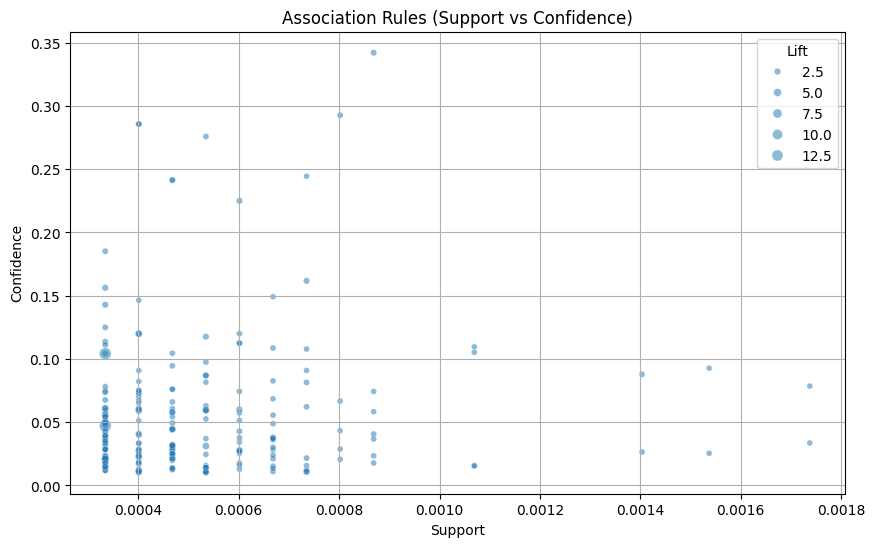

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Support", y="Confidence", size="Lift", data=result_df, alpha=0.5)
plt.title('Association Rules (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

/tmp/ipython-input-585640022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lift', y='Right-hand Side', data=recommendations_df, palette='viridis')


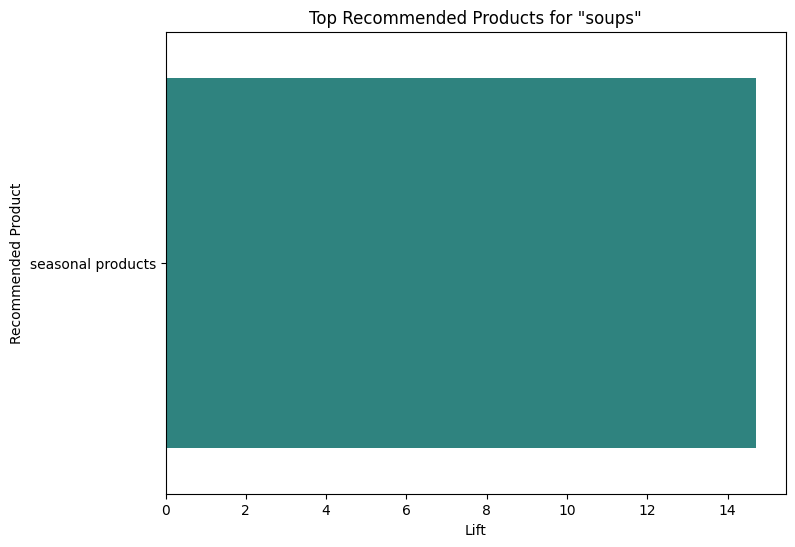

In [ ]:
def recommend_products(product_name, rules_df, top_n=5):
    """
    Recommends top N products based on association rules for a given product.

    Args:
        product_name (str): The name of the product for which to get recommendations.
        rules_df (pd.DataFrame): DataFrame containing association rules.
        top_n (int): The number of top recommendations to return.

    Returns:
        pd.DataFrame: DataFrame containing the top N recommended products and their lift.
    """
    # Filter rules where the product_name is in the left-hand side
    recommendations = rules_df[rules_df['Left-hand Side'].str.contains(product_name, case=False, na=False)].copy()

    # Sort recommendations by Lift in descending order
    recommendations = recommendations.sort_values(by='Lift', ascending=False)

    # Get the top N recommendations
    top_recommendations = recommendations.head(top_n)

    return top_recommendations[['Right-hand Side', 'Lift']]

def visualize_recommendations(recommendations_df, product_name):
    """
    Visualizes the top recommended products as a horizontal bar graph.

    Args:
        recommendations_df (pd.DataFrame): DataFrame containing the top recommended products and their lift.
        product_name (str): The name of the product for which recommendations are made.
    """
    if not recommendations_df.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Lift', y='Right-hand Side', data=recommendations_df, palette='viridis')
        plt.title(f'Top Recommended Products for "{product_name}"')
        plt.xlabel('Lift')
        plt.ylabel('Recommended Product')
        plt.show()
    else:
        print(f"No recommendations found for '{product_name}'.")

# Example usage:
product_to_recommend = 'soups' # Replace with the product you want recommendations for
top_recommendations = recommend_products(product_to_recommend, result_df)
visualize_recommendations(top_recommendations, product_to_recommend)

In [ ]:
# Convert the result to a pandas DataFrame for better visualization
def inspect(results):
    items = set()
    for result in results:
        for item in result.items:
            items.add(item)
    items = list(items)
    rows = []
    for result in results:
        support = result.support
        for rule in result.ordered_statistics:
            lhs = ', '.join(list(rule.items_base))
            rhs = ', '.join(list(rule.items_add))
            confidence = rule.confidence
            lift = rule.lift
            rows.append({'Itemset': ', '.join(list(result.items)), 'Support': support, 'Left-hand Side': lhs, 'Right-hand Side': rhs, 'Confidence': confidence, 'Lift': lift})
    df = pd.DataFrame(rows, columns=['Itemset', 'Support', 'Left-hand Side', 'Right-hand Side', 'Confidence', 'Lift'])
    return df

result_df = inspect(result)
display(result_df.head())

,Itemset,Support,Left-hand Side,Right-hand Side,Confidence,Lift
0,"UHT-milk, butter milk",0.000601,UHT-milk,butter milk,0.028125,1.600131
1,"UHT-milk, butter milk",0.000601,butter milk,UHT-milk,0.034221,1.600131
2,"cream cheese , UHT-milk",0.000869,UHT-milk,cream cheese,0.040625,1.717152
3,"cream cheese , UHT-milk",0.000869,cream cheese,UHT-milk,0.036723,1.717152
4,"artif. sweetener, soda",0.000468,artif. sweetener,soda,0.241379,2.485725


/tmp/ipython-input-585640022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lift', y='Right-hand Side', data=recommendations_df, palette='viridis')


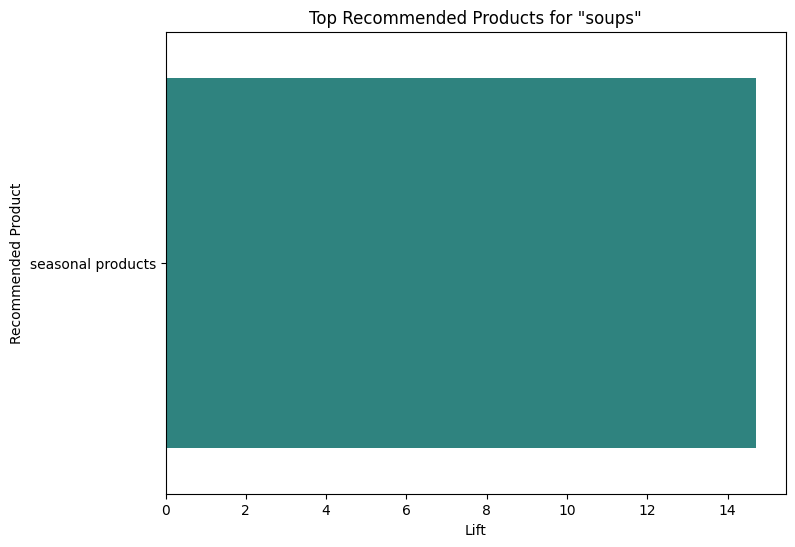

In [ ]:
# Example usage:
product_to_recommend = 'soups' # Replace with the product you want recommendations for
top_recommendations = recommend_products(product_to_recommend, result_df)
visualize_recommendations(top_recommendations, product_to_recommend)